In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_weather = pd.read_csv('west_nile/input/weather.csv')

In [5]:
df_weather.head(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [45]:
df_W = df_weather.drop(['Station', 'Date', 'Water1', 'Depart', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'SnowFall'], axis=1)

In [46]:
df_W.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,83,50,67,51,56,0,2,0.00,29.10,29.82,1.7,27,9.2
1,84,52,68,51,57,0,3,0.00,29.18,29.82,2.7,25,9.6
2,59,42,51,42,47,14,0,0.00,29.38,30.09,13.0,4,13.4
3,60,43,52,42,47,13,0,0.00,29.44,30.08,13.3,2,13.4
4,66,46,56,40,48,9,0,0.00,29.39,30.12,11.7,7,11.9


In [47]:
def missing_value(x):
    try:
        float(x)
        return x
    except Exception:
        return np.nan

In [48]:
for item in df_W.columns.tolist():
    df_W[item] = df_W[item].apply(missing_value)

In [49]:
df_W.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,83,50,67,51,56,0,2,0.00,29.10,29.82,1.7,27,9.2
1,84,52,68,51,57,0,3,0.00,29.18,29.82,2.7,25,9.6
2,59,42,51,42,47,14,0,0.00,29.38,30.09,13.0,4,13.4
3,60,43,52,42,47,13,0,0.00,29.44,30.08,13.3,2,13.4
4,66,46,56,40,48,9,0,0.00,29.39,30.12,11.7,7,11.9


In [67]:
# impute values (most freq: Tavg, WetBulb, Heat, Cool, PrecipTotal, StnPressure, SeaLevel, AvgSpeed)

from sklearn.preprocessing import Imputer
imr = Imputer(strategy='most_frequent')

for item in df_W.columns.tolist():
    imr.fit(df_W[item].reshape(-1,1))
    df_W[item] = imr.transform(df_W[item].reshape(-1,1))

In [72]:
# PCA

# standardize 
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(df_W)

In [76]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [83]:
exp_var=pca.explained_variance_ #explained variance of the principal components
exp_var_rat=pca.explained_variance_ratio_ #ratio of total variance

cum_var=np.cumsum(exp_var)/sum(exp_var)

In [84]:
cum_var

array([ 0.49274815,  0.69174455,  0.79522221,  0.86990151,  0.93469223,
        0.9682245 ,  0.9844783 ,  0.99127588,  0.99734997,  0.99932116,
        0.99969204,  0.99990743,  1.        ])

In [85]:
len(cum_var)

13

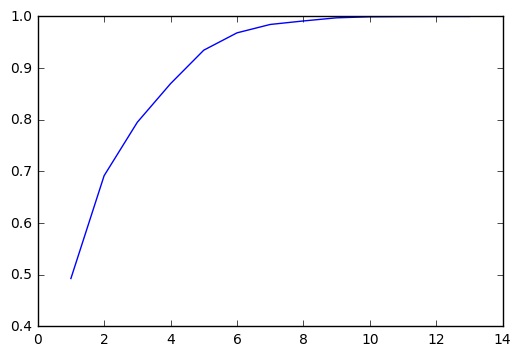

In [89]:
plt.plot(range(1, len(cum_var) + 1), cum_var)
plt.show()

In [99]:
weather_final=pd.concat([df_weather.iloc[:,:2],pd.DataFrame(X_pca[:,:5],columns=["PCAw_1","PCAw_2","PCAw_3","PCAw_4","PCAw_5"])],axis=1)
weather_final.head()

,Station,Date,PCAw_1,PCAw_2,PCAw_3,PCAw_4,PCAw_5
0,1,2007-05-01,-0.057721,0.533772,1.567441,-1.061174,-0.773029
1,2,2007-05-01,-0.205414,0.418893,1.068407,-0.873617,-0.634203
2,1,2007-05-02,4.006804,0.841067,-1.672665,1.283971,-0.160402
3,2,2007-05-02,3.888912,0.657485,-1.902866,1.466794,-0.156672
4,1,2007-05-03,3.166913,0.250539,-1.528977,0.957092,-0.130787


In [101]:
weather_final.to_csv('weather_final.csv')